# IMPORT LIBRARIES AND DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from tabulate import tabulate
from IPython.display import display
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from google.colab import files
import string

# Load CSV dan rename kolom
df1 = pd.read_csv("/content/job_resumes.csv")
df2 = pd.read_csv("/content/jobstreet_all_job_dataset.csv", engine='python', on_bad_lines='skip')
df1.rename(columns={
    "Category": "category",
    "Text": "descriptions"
}, inplace=True)

# Misalnya dataframe kamu bernama df
df2.drop(columns=[
    'job_id', 'job_title', 'company', 'location', 'subcategory',
    'role', 'type', 'salary', 'listingDate'
], inplace=True)

# Tampilkan df1
print("Dataset Job Resume Classification:")
display(df1)

# Tampilkan df2
print("Jobstreet Dataset")
display(df2)

Dataset Job Resume Classification:


,category,descriptions
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...
...,...,...
13384,Web Designing,jessica claire montgomery street san francisco...
13385,Web Designing,jessica claire montgomery street san francisco...
13386,Web Designing,summary jessica claire 100 montgomery st 10th ...
13387,Web Designing,jessica claire montgomery street san francisco...


Jobstreet Dataset


,descriptions,category
0,Position Purpose\nManage aspects of procuremen...,"Manufacturing, Transport & Logistics"
1,We are looking for a Account Executive/ Assist...,Accounting
2,Performs detailed data analysis on existing sp...,"Manufacturing, Transport & Logistics"
3,"You are important for troubleshooting, install...",Engineering
4,"MAG is a trailblazer in the industry, boasting...","Manufacturing, Transport & Logistics"
...,...,...
59301,MAIN RESPONSIBILITIES\nSupport the Asia Pacifi...,Marketing & Communications
59302,Job Descriptions:\nPartner closely with HRBPs ...,Human Resources & Recruitment
59303,Objective:\nHighly motivated and customer-focu...,Insurance & Superannuation
59304,Job Descriptions:\nDelivers sales target for b...,Banking & Financial Services


Dataset Job Resume Classification:


,category,descriptions
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...
...,...,...
13384,Web Designing,jessica claire montgomery street san francisco...
13385,Web Designing,jessica claire montgomery street san francisco...
13386,Web Designing,summary jessica claire 100 montgomery st 10th ...
13387,Web Designing,jessica claire montgomery street san francisco...


Jobstreet Dataset


,descriptions,category
0,Position Purpose\nManage aspects of procuremen...,"Manufacturing, Transport & Logistics"
1,We are looking for a Account Executive/ Assist...,Accounting
2,Performs detailed data analysis on existing sp...,"Manufacturing, Transport & Logistics"
3,"You are important for troubleshooting, install...",Engineering
4,"MAG is a trailblazer in the industry, boasting...","Manufacturing, Transport & Logistics"
...,...,...
59301,MAIN RESPONSIBILITIES\nSupport the Asia Pacifi...,Marketing & Communications
59302,Job Descriptions:\nPartner closely with HRBPs ...,Human Resources & Recruitment
59303,Objective:\nHighly motivated and customer-focu...,Insurance & Superannuation
59304,Job Descriptions:\nDelivers sales target for b...,Banking & Financial Services


In [3]:
print("DataFrame 1 (Resume) Information\n")
print(df1.info())

print("\nDataFrame 1 (Resume) Description\n")
print(df1.describe(include='all'))  # include='all' untuk semua tipe data

print("\nDataFrame 2 (Jobstreet) Information\n")
print(df2.info())

print("\nDataFrame 2 (Jobstreet) Description\n")
print(df2.describe(include='all'))

DataFrame 1 (Resume) Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      13389 non-null  object
 1   descriptions  13389 non-null  object
dtypes: object(2)
memory usage: 209.3+ KB
None

DataFrame 1 (Resume) Description

         category                                       descriptions
count       13389                                              13389
unique         43                                              12085
top     Education  jessica claire 100 montgomery st 10th floor 55...
freq          410                                                  5

DataFrame 2 (Jobstreet) Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59306 entries, 0 to 59305
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   descriptions  59306 non-null

# MISSING VALUES

In [4]:
# Cek missing values df1
null_values_df1 = df1.isna().sum().sum()
total_data_df1 = df1.shape[0]
print(f"DataFrame 1 (Resume): Total Missing Values = {null_values_df1} ({round(null_values_df1/total_data_df1*100, 2)}%)")

# Cek missing values df2
null_values_df2 = df2.isna().sum().sum()
total_data_df2 = df2.shape[0]
print(f"DataFrame 2 (Jobstreet): Total Missing Values = {null_values_df2} ({round(null_values_df2/total_data_df2*100, 2)}%)")

DataFrame 1 (Resume): Total Missing Values = 0 (0.0%)
DataFrame 2 (Jobstreet): Total Missing Values = 0 (0.0%)


In [5]:
# Hapus missing values dari df1
df1_rm = df1.dropna()
print("Missing values in df1 after removal:")
print(df1_rm.isna().sum())

# Hapus missing values dari df2
df2_rm = df2.dropna()
print("\nMissing values in df2 after removal:")
print(df2_rm.isna().sum())

Missing values in df1 after removal:
category        0
descriptions    0
dtype: int64

Missing values in df2 after removal:
descriptions    0
category        0
dtype: int64


# EXPLORE KATEGORI

In [6]:
# Distribusi kategori di df1 (resume)
print("Kategori di df1 (Resume):")
print(df1_rm['category'].value_counts())

# Distribusi kategori di df2 (Jobstreet)
print("\nKategori di df2 (Jobstreet):")
print(df2_rm['category'].value_counts())

Kategori di df1 (Resume):
category
Education                    410
Electrical Engineering       384
Mechanical Engineer          384
Consultant                   368
Sales                        364
Civil Engineer               364
Management                   361
Human Resources              360
Digital Media                358
Accountant                   350
Java Developer               348
Operations Manager           345
Building and Construction    345
Testing                      344
Architecture                 344
Aviation                     340
Business Analyst             340
Finance                      339
SQL Developer                338
Public Relations             337
Health and Fitness           332
Arts                         332
Network Security Engineer    330
DotNet Developer             329
Apparel                      320
Banking                      314
Automobile                   313
Web Designing                309
SAP Developer                304
Data Sci

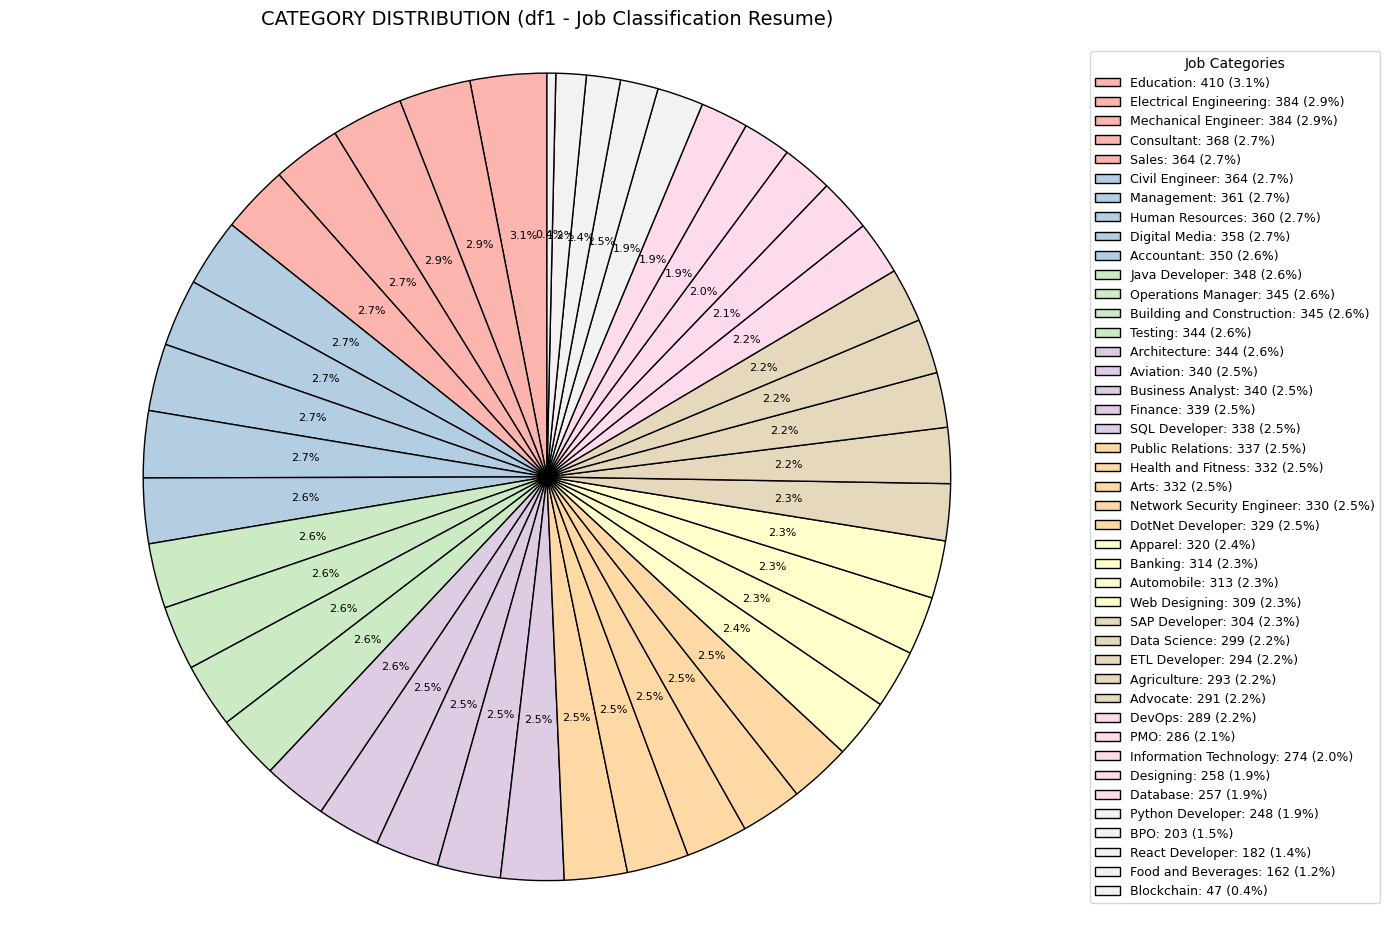

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data
category_counts = df1_rm['category'].value_counts()
labels = category_counts.index
values = category_counts.values
total = values.sum()

# Warna pastel yang soft
colors = plt.cm.Pastel1(np.linspace(0, 1, len(labels)))

# Buat figure
fig, ax = plt.subplots(figsize=(14, 10))

# Pie chart dengan garis irisan hitam dan persentase di dalam
wedges, texts, autotexts = ax.pie(
    values,
    colors=colors,
    startangle=90,
    radius=1,
    autopct='%1.1f%%',
    textprops=dict(color="black", fontsize=8),
    wedgeprops={'edgecolor': 'black'}  # garis pemisah irisan pie jadi hitam
)

# Legend
legend_labels = [
    f"{label}: {value} ({(value / total) * 100:.1f}%)"
    for label, value in zip(labels, values)
]

ax.legend(
    wedges,
    legend_labels,
    title="Job Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

# Judul dan layout
plt.title("CATEGORY DISTRIBUTION (df1 - Job Classification Resume)", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

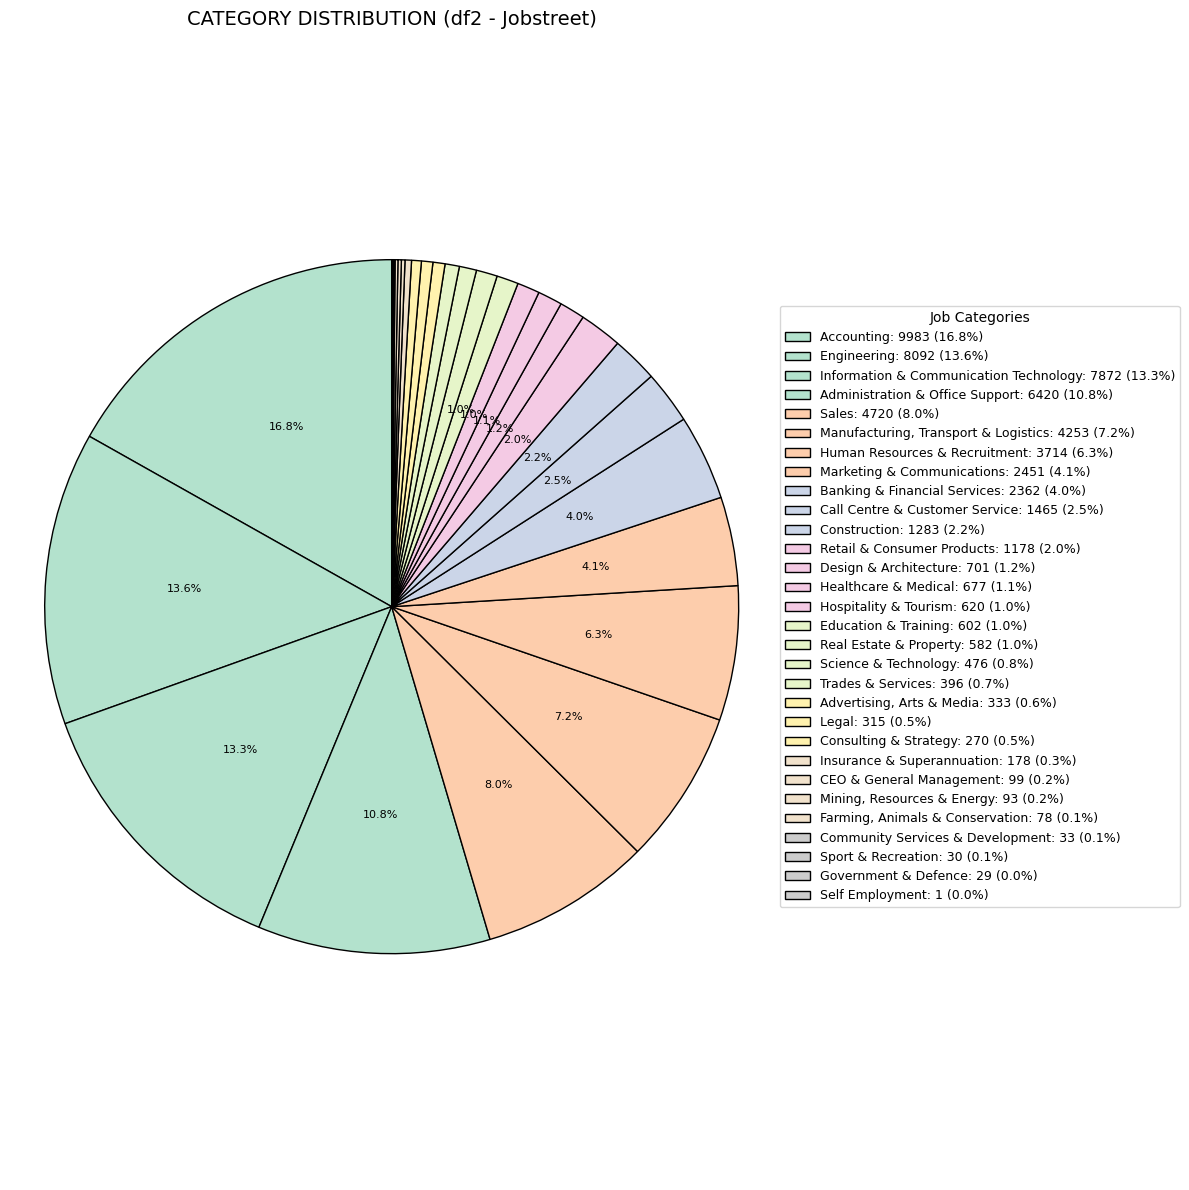

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data dari df2
counts = df2_rm['category'].value_counts()
labels = counts.index
sizes = counts.values
total = sizes.sum()

# Warna pastel lembut
colors = plt.cm.Pastel2(np.linspace(0, 1, len(labels)))

# Ukuran pie diperkecil radiusnya agar tampilan rapi
fig, ax = plt.subplots(figsize=(12, 12))

# Pie chart biasa
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # kita atur legend manual
    colors=colors,
    startangle=90,
    radius=0.85,  # ⚠️ radius DIKURANGI agar tidak terlalu besar
    autopct=lambda pct: f"{pct:.1f}%" if pct >= 1 else '',  # tampilkan hanya >1%
    textprops={'fontsize': 8, 'color': 'black'},
    wedgeprops={'edgecolor': 'black'}
)

# Legend samping yang tetap menjelaskan lengkap
legend_labels = [
    f"{label}: {val} ({(val / total) * 100:.1f}%)"
    for label, val in zip(labels, sizes)
]

ax.legend(
    wedges,
    legend_labels,
    title="Job Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

# Judul dan pengaturan
plt.title("CATEGORY DISTRIBUTION (df2 - Jobstreet)", fontsize=14)
plt.axis('equal')  # menjaga bentuk lingkaran proporsional
plt.tight_layout()
plt.show()


# TEXT CLEANING

## Cleaning Text

In [ ]:
def clean_text(text):
    """
    Membersihkan teks:
    - Menghapus URL
    - Menghapus email
    - Menghapus mention dan hashtag
    - Menghapus angka
    - Menghapus tanda baca
    """
    if pd.isna(text):
        return ""

    # Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Hapus email
    text = re.sub(r'\S+@\S+', '', text)
    # Hapus mention dan hashtag
    text = re.sub(r'@\w+|#\w+', '', text)
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def clean_dataframe(df):
    # Assuming 'descriptions' is the column to clean
    df['clean_descriptions'] = df['descriptions'].apply(clean_text)
    return df[['descriptions', 'clean_descriptions']].head()


# Now you should be able to use df1_rm within your clean_dataframe function:
print("Dataset Job:")
display(clean_dataframe(df1_rm))  # Now this should work

print("Dataset Job IT:")
display(clean_dataframe(df2_rm))

Dataset Job:


,descriptions,clean_descriptions
0,education omba executive leadership university...,education omba executive leadership university...
1,howard gerrard accountant deyjobcom birmingham...,howard gerrard accountant deyjobcom birmingham...
2,kevin frank senior accountant inforesumekraftc...,kevin frank senior accountant inforesumekraftc...
3,place birth nationality olivia ogilvy accounta...,place birth nationality olivia ogilvy accounta...
4,stephen greet cpa senior accountant 9 year exp...,stephen greet cpa senior accountant year exper...


Dataset Job IT:


KeyboardInterrupt: 

## Case Folding

In [ ]:
def case_folding(text):
    """
    Mengubah teks menjadi huruf kecil.
    """
    if pd.isna(text):
        return ""
    return text.lower()

def case_dataframe(df):
    if 'clean_descriptions' in df.columns:
        df['case_descriptions'] = df['clean_descriptions'].apply(case_folding)
        return df[['clean_descriptions', 'case_descriptions']].head()

print("Dataset Job:")
display(case_dataframe(df1_rm))  # Now this should work

print("Dataset Job IT:")
display(case_dataframe(df2_rm))

## Tokenizing

In [ ]:
def tokenize_text(text):
    """
    Memecah teks menjadi token (kata-kata).
    """
    if pd.isna(text):
        return []
    return word_tokenize(text)

def tokenizing_dataframe(df):
    if 'case_descriptions' in df.columns:
        df['tokenizing_descriptions'] = df['case_descriptions'].apply(case_folding)
        return df[['case_descriptions', 'tokenizing_descriptions']].head()

print("Dataset Job:")
display(tokenizing_dataframe(df1_rm))  # Now this should work

print("Dataset Job IT:")
display(tokenizing_dataframe(df2_rm))

## Stopword Removal

In [ ]:
nltk.download('stopwords')

# Set stopwords
stop_words = set(stopwords.words('english'))

# Daftar nama orang yang mau dihapus (bisa kamu tambah)
nama_orang = set([
    'jessica', 'claire', 'stephen', 'olivia', 'kevin', 'howard', 'frank', 'olivia', 'st', 'th', 'newyork',
    'greet', 'gerrard', 'san', 'francisco', 'ca', 'street', 'include', 'city','state', 'montgomery'  # tambahkan jika ada yang spesifik
])

# Gabungkan stopwords dan nama orang jadi satu set
kata_terlarang = stop_words.union(nama_orang)

def remove_stopwords_and_names(text):
    if pd.isna(text):
        return ""
    words = text.split()
    words = [word for word in words if word not in kata_terlarang]
    return " ".join(words)

def stopword_dataframe(df):
    if 'tokenizing_descriptions' in df.columns:
        df['stopword_descriptions'] = df['tokenizing_descriptions'].apply(remove_stopwords_and_names)
        return df[['tokenizing_descriptions', 'stopword_descriptions']].head()

# Tampilkan hasil
print("Dataset Job:")
display(stopword_dataframe(df1_rm))

print("Dataset Job IT:")
display(stopword_dataframe(df2_rm))

## Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if pd.isna(text):
        return ""
    words = text.split()
    words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    words = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in words]
    words = [re.sub(r'(?<!s)s$', '', word) for word in words]
    words = [re.sub(r'(?<!e)es$', '', word) for word in words]
    words = [re.sub(r'(?<!e)ly$', '', word) for word in words]
    return " ".join(words)

def lemmatize_dataframe(df):
    if 'stopword_descriptions' in df.columns:
        df['lemma_descriptions'] = df['stopword_descriptions'].apply(lemmatize_text)
        return df[['stopword_descriptions', 'lemma_descriptions']].head()

# Tampilkan hasil
print("Dataset Job:")
display(lemmatize_dataframe(df1_rm))

print("Dataset Job IT:")
display(lemmatize_dataframe(df2_rm))

## Wordcloud

In [ ]:
text_data_df1 = " ".join(df1_rm['lemma_descriptions'].dropna())

wordcloud_df1 = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text_data_df1)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_df1, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Dataset Job", fontsize=14)
plt.show()

In [ ]:
text_data_df2 = " ".join(df2_rm['lemma_descriptions'].dropna())

wordcloud_df2 = WordCloud(width=800, height=400, background_color='white', colormap='plasma', max_words=200).generate(text_data_df2)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_df2, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Dataset Jobstreet", fontsize=14)
plt.show()

# LABEL ENCODING

In [ ]:
train_set, test_set = train_test_split(df1_rm, test_size=0.2, random_state=42, stratify=df1_rm['category'])

In [ ]:
label_encoder = LabelEncoder()

# Encode kategori
train_set['category_encoded'] = label_encoder.fit_transform(train_set['category'])
test_set['category_encoded'] = label_encoder.transform(test_set['category'])

# Buat tabel mapping kategori
category_mapping = pd.DataFrame({
    'category': label_encoder.classes_,
    'category_encoded': range(len(label_encoder.classes_))
})

print("Mapping kategori:")
print(category_mapping)

In [ ]:
train_set, test_set = train_test_split(df2_rm, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
label_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Encode kategori
train_set['category_encoded'] = label_encoder.fit_transform(train_set[['category']]).astype(int)
test_set['category_encoded'] = label_encoder.transform(test_set[['category']]).astype(int)

# Buat tabel mapping kategori
category_mapping = pd.DataFrame({
    'category': label_encoder.categories_[0],
    'category_encoded': range(len(label_encoder.categories_[0]))
})

print("Mapping kategori:")
print(category_mapping)

# TF-IDF

In [ ]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# --- For df1 (Resume) ---
# Ensure df1_rm has 'category_encoded' column
label_encoder_df1 = LabelEncoder()  # Create a separate LabelEncoder for df1
df1_rm['category_encoded'] = label_encoder_df1.fit_transform(df1_rm['category'])

# Split df1_rm into train and test sets
train_set_df1, test_set_df1 = train_test_split(df1_rm, test_size=0.2, random_state=42, stratify=df1_rm['category'])

X_train_df1 = train_set_df1['lemma_descriptions']
X_test_df1 = test_set_df1['lemma_descriptions']

# Training and transforming for df1
X_train_tfidf_df1 = pd.DataFrame(vectorizer.fit_transform(X_train_df1).toarray(),
                                   columns=vectorizer.get_feature_names_out())
X_test_tfidf_df1 = pd.DataFrame(vectorizer.transform(X_test_df1).toarray(),
                                  columns=vectorizer.get_feature_names_out())

print("TF-IDF Vectorization for df1 (Resume) Selesai")
print("Dimensi Matrix TF-IDF Data Train (df1):", X_train_tfidf_df1.shape)
print("Dimensi Matrix TF-IDF Data Test (df1):", X_test_tfidf_df1.shape)

# --- For df2 (Jobstreet) ---
# Re-initialize vectorizer if needed
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_df2 = train_set['lemma_descriptions'] # Use the existing train_set from df2_rm
X_test_df2 = test_set['lemma_descriptions']  # Use the existing test_set from df2_rm

X_train_tfidf_df2 = pd.DataFrame(vectorizer.fit_transform(X_train_df2).toarray(),
                                   columns=vectorizer.get_feature_names_out())
X_test_tfidf_df2 = pd.DataFrame(vectorizer.transform(X_test_df2).toarray(),
                                  columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Vectorization for df2 (Jobstreet) Selesai")
print("Dimensi Matrix TF-IDF Data Train (df2):", X_train_tfidf_df2.shape)
print("Dimensi Matrix TF-IDF Data Test (df2):", X_test_tfidf_df2.shape)

# FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k_best_features_count = 500  # Atur jumlah fitur terpilih

# --- DF1 ---
selector_df1 = SelectKBest(score_func=chi2, k=k_best_features_count)

# y untuk df1
y_train_df1 = train_set_df1['category_encoded']
y_test_df1 = test_set_df1['category_encoded']

# Fit transform ke training
X_train_selected_df1 = selector_df1.fit_transform(X_train_tfidf_df1, y_train_df1)

# Mask fitur yang dipilih
mask_df1 = selector_df1.get_support()

# Apply mask ke test data
X_test_selected_df1 = X_test_tfidf_df1.loc[:, mask_df1]

# Ambil nama fitur
selected_features_df1 = vectorizer.get_feature_names_out()[mask_df1]

# Konversi kembali jadi DataFrame
X_train_selected_df1 = pd.DataFrame(X_train_selected_df1, columns=selected_features_df1)
X_test_selected_df1 = pd.DataFrame(X_test_selected_df1, columns=selected_features_df1)

print("\nFeature Selection untuk df1 (Resume) selesai")
print("Train shape (df1):", X_train_selected_df1.shape)
print("Test shape  (df1):", X_test_selected_df1.shape)

In [ ]:
# --- DF2 ---
selector_df2 = SelectKBest(score_func=chi2, k=k_best_features_count)

# Pastikan ambil label dari df2 (kategori sudah encoded sebelumnya)
y_train_df2 = train_set['category_encoded']
y_test_df2 = test_set['category_encoded']

# Fit transform ke training
X_train_selected_df2 = selector_df2.fit_transform(X_train_tfidf_df2, y_train_df2)

# Mask fitur yang dipilih
mask_df2 = selector_df2.get_support()

# Apply mask ke test data
X_test_selected_df2 = X_test_tfidf_df2.loc[:, mask_df2]

# Ambil nama fitur
selected_features_df2 = vectorizer.get_feature_names_out()[mask_df2]

# Konversi kembali jadi DataFrame
X_train_selected_df2 = pd.DataFrame(X_train_selected_df2, columns=selected_features_df2)
X_test_selected_df2 = pd.DataFrame(X_test_selected_df2, columns=selected_features_df2)

print("\nFeature Selection untuk df2 (Jobstreet) selesai")
print("Train shape (df2):", X_train_selected_df2.shape)
print("Test shape  (df2):", X_test_selected_df2.shape)

# MODELLING KNN

In [ ]:
# Range nilai k
k_values = range(1, 6)

print("Classification Resume Dataset")
mean_scores_df1 = []
best_classification_report_df1 = None
best_accuracy_df1 = 0

X_selected_df1 = X_train_selected_df1
y_df1 = train_set_df1['category_encoded']

for k in k_values:
    knn_df1 = KNeighborsClassifier(n_neighbors=k)
    cv_df1 = KFold(n_splits=10, shuffle=True, random_state=42)

    fold_reports_df1 = []
    fold_conf_matrices_df1 = []
    fold_accuracies_df1 = []
    fold_precisions_df1 = []
    fold_recalls_df1 = []
    fold_f1s_df1 = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv_df1.split(X_selected_df1, y_df1)):
        X_train_df1, X_test_df1 = X_selected_df1.iloc[train_idx], X_selected_df1.iloc[test_idx]
        y_train_df1, y_test_df1 = y_df1.iloc[train_idx], y_df1.iloc[test_idx]

        knn_df1.fit(X_train_df1, y_train_df1)
        y_pred_df1 = knn_df1.predict(X_test_df1)

        acc = (y_pred_df1 == y_test_df1).mean()
        fold_accuracies_df1.append(acc)

        report_dict = classification_report(y_test_df1, y_pred_df1, output_dict=True)
        fold_reports_df1.append(report_dict)

        fold_precisions_df1.append(report_dict['macro avg']['precision'])
        fold_recalls_df1.append(report_dict['macro avg']['recall'])
        fold_f1s_df1.append(report_dict['macro avg']['f1-score'])

        print(f"k={k}, Fold {fold_idx + 1}:")
        print(f"  Accuracy : {acc:.4f}")
        print(f"  Precision: {report_dict['macro avg']['precision']:.4f}")
        print(f"  Recall   : {report_dict['macro avg']['recall']:.4f}")
        print(f"  F1-Score : {report_dict['macro avg']['f1-score']:.4f}")
        print(classification_report(y_test_df1, y_pred_df1))

        cm_df1 = confusion_matrix(y_test_df1, y_pred_df1)
        fold_conf_matrices_df1.append(cm_df1)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df1, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y_df1), yticklabels=np.unique(y_df1))
        plt.title(f'Confusion Matrix for k={k}, Fold {fold_idx + 1} (Classification Resume Dataset)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    scores_df1 = cross_val_score(knn_df1, X_selected_df1, y_df1, cv=cv_df1, scoring='accuracy')
    mean_scores_df1.append(scores_df1.mean())

    if fold_accuracies_df1 and max(fold_accuracies_df1) > best_accuracy_df1:
        best_accuracy_df1 = max(fold_accuracies_df1)
        best_classification_report_df1 = fold_reports_df1[fold_accuracies_df1.index(best_accuracy_df1)]

optimal_k_df1_index = np.argmax(mean_scores_df1)
optimal_k_df1 = k_values[optimal_k_df1_index]
best_accuracy_df1 = mean_scores_df1[optimal_k_df1_index]

print(f"\nOptimal number of neighbors (k) forClassification Resume Dataset: {optimal_k_df1}")
print(f"Best accuracy with optimal k for Classification Resume Dataset: {best_accuracy_df1:.4f}")
print("\nBest Classification Report for Classification Resume Dataset:")
print(best_classification_report_df1)

print("Classification Job Description Dataset")
mean_scores_df2 = []
best_classification_report_df2 = None
best_accuracy_df2 = 0

X_selected_df2 = X_train_selected_df2
y_df2 = train_set['category_encoded']

for k in k_values:
    knn_df2 = KNeighborsClassifier(n_neighbors=k)
    cv_df2 = KFold(n_splits=10, shuffle=True, random_state=42)

    fold_reports_df2 = []
    fold_conf_matrices_df2 = []
    fold_accuracies_df2 = []
    fold_precisions_df2 = []
    fold_recalls_df2 = []
    fold_f1s_df2 = []

    for fold_idx, (train_idx, test_idx) in enumerate(cv_df2.split(X_selected_df2, y_df2)):
        X_train_df2, X_test_df2 = X_selected_df2.iloc[train_idx], X_selected_df2.iloc[test_idx]
        y_train_df2, y_test_df2 = y_df2.iloc[train_idx], y_df2.iloc[test_idx]

        knn_df2.fit(X_train_df2, y_train_df2)
        y_pred_df2 = knn_df2.predict(X_test_df2)

        acc = (y_pred_df2 == y_test_df2).mean()
        fold_accuracies_df2.append(acc)

        report_dict = classification_report(y_test_df2, y_pred_df2, output_dict=True)
        fold_reports_df2.append(report_dict)

        fold_precisions_df2.append(report_dict['macro avg']['precision'])
        fold_recalls_df2.append(report_dict['macro avg']['recall'])
        fold_f1s_df2.append(report_dict['macro avg']['f1-score'])

        print(f"k={k}, Fold {fold_idx + 1}:")
        print(f"  Accuracy : {acc:.4f}")
        print(f"  Precision: {report_dict['macro avg']['precision']:.4f}")
        print(f"  Recall   : {report_dict['macro avg']['recall']:.4f}")
        print(f"  F1-Score : {report_dict['macro avg']['f1-score']:.4f}")
        print(classification_report(y_test_df2, y_pred_df2))

        cm_df2 = confusion_matrix(y_test_df2, y_pred_df2)
        fold_conf_matrices_df2.append(cm_df2)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df2, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y_df2), yticklabels=np.unique(y_df2))
        plt.title(f'Confusion Matrix for k={k}, Fold {fold_idx + 1} (Dataset Jobstreet)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    scores_df2 = cross_val_score(knn_df2, X_selected_df2, y_df2, cv=cv_df2, scoring='accuracy')
    mean_scores_df2.append(scores_df2.mean())

    if fold_accuracies_df2 and max(fold_accuracies_df2) > best_accuracy_df2:
        best_accuracy_df2 = max(fold_accuracies_df2)
        best_classification_report_df2 = fold_reports_df2[fold_accuracies_df2.index(best_accuracy_df2)]

optimal_k_df2_index = np.argmax(mean_scores_df2)
optimal_k_df2 = k_values[optimal_k_df2_index]
best_accuracy_df2 = mean_scores_df2[optimal_k_df2_index]

print(f"\nOptimal number of neighbors (k) for Dataset Jobstreet: {optimal_k_df2}")
print(f"Best accuracy with optimal k for Dataset Jobstreet: {best_accuracy_df2:.4f}")
print("\nBest Classification Report for Dataset Jobstreet:")
print(best_classification_report_df2)

# MODELLING RANDOM FOREST

In [ ]:
# Inisialisasi Random Forest
rf = RandomForestClassifier(random_state=42)

print("Classification Resume Dataset")
X_df1 = X_train_selected_df1
y_df1 = train_set_df1['category_encoded']

cv_df1 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies_df1, fold_precisions_df1, fold_recalls_df1, fold_f1s_df1 = [], [], [], []
fold_reports_df1, fold_conf_matrices_df1 = [], []

for fold_idx, (train_idx, test_idx) in enumerate(cv_df1.split(X_df1, y_df1)):
    X_train_df1, X_test_df1 = X_df1.iloc[train_idx], X_df1.iloc[test_idx]
    y_train_df1, y_test_df1 = y_df1.iloc[train_idx], y_df1.iloc[test_idx]

    rf.fit(X_train_df1, y_train_df1)
    y_pred_df1 = rf.predict(X_test_df1)

    acc = (y_pred_df1 == y_test_df1).mean()
    fold_accuracies_df1.append(acc)

    report = classification_report(y_test_df1, y_pred_df1, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    fold_precisions_df1.append(precision)
    fold_recalls_df1.append(recall)
    fold_f1s_df1.append(f1)
    fold_reports_df1.append(report)

    print(f"\nFold {fold_idx + 1} (Dataset Job):")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test_df1, y_pred_df1)}")

    cm = confusion_matrix(y_test_df1, y_pred_df1)
    fold_conf_matrices_df1.append(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_df1), yticklabels=np.unique(y_df1))
    plt.title(f'Confusion Matrix Fold {fold_idx + 1} (Dataset Job)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Rata-rata
print("\nAverage Metrics for Dataset Job (10 folds):")
print(f"Accuracy : {np.mean(fold_accuracies_df1):.4f}")
print(f"Precision: {np.mean(fold_precisions_df1):.4f}")
print(f"Recall   : {np.mean(fold_recalls_df1):.4f}")
print(f"F1-Score : {np.mean(fold_f1s_df1):.4f}")

print("Classification Job Description Dataset")
X_df2 = X_train_selected_df2
y_df2 = train_set['category_encoded']  # Pastikan ini dari df2

cv_df2 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies_df2, fold_precisions_df2, fold_recalls_df2, fold_f1s_df2 = [], [], [], []
fold_reports_df2, fold_conf_matrices_df2 = [], []

for fold_idx, (train_idx, test_idx) in enumerate(cv_df2.split(X_df2, y_df2)):
    X_train_df2, X_test_df2 = X_df2.iloc[train_idx], X_df2.iloc[test_idx]
    y_train_df2, y_test_df2 = y_df2.iloc[train_idx], y_df2.iloc[test_idx]

    rf.fit(X_train_df2, y_train_df2)
    y_pred_df2 = rf.predict(X_test_df2)

    acc = (y_pred_df2 == y_test_df2).mean()
    fold_accuracies_df2.append(acc)

    report = classification_report(y_test_df2, y_pred_df2, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    fold_precisions_df2.append(precision)
    fold_recalls_df2.append(recall)
    fold_f1s_df2.append(f1)
    fold_reports_df2.append(report)

    print(f"\nFold {fold_idx + 1} (Dataset Job IT):")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test_df2, y_pred_df2)}")

    cm = confusion_matrix(y_test_df2, y_pred_df2)
    fold_conf_matrices_df2.append(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_df2), yticklabels=np.unique(y_df2))
    plt.title(f'Confusion Matrix Fold {fold_idx + 1} (Dataset Job IT)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Rata-rata
print("\nAverage Metrics for Dataset Job IT (10 folds):")
print(f"Accuracy : {np.mean(fold_accuracies_df2):.4f}")
print(f"Precision: {np.mean(fold_precisions_df2):.4f}")
print(f"Recall   : {np.mean(fold_recalls_df2):.4f}")
print(f"F1-Score : {np.mean(fold_f1s_df2):.4f}")

# MODELLING NAIVE BAYES

In [ ]:
# Inisialisasi model Naive Bayes
nb = MultinomialNB()

print("Classification Resume Dataset")
X_df1 = X_train_selected_df1
y_df1 = train_set_df1['category_encoded']

cv_df1 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies_df1, fold_precisions_df1, fold_recalls_df1, fold_f1s_df1 = [], [], [], []
fold_reports_df1, fold_conf_matrices_df1 = [], []

for fold_idx, (train_idx, test_idx) in enumerate(cv_df1.split(X_df1, y_df1)):
    X_train_df1, X_test_df1 = X_df1.iloc[train_idx], X_df1.iloc[test_idx]
    y_train_df1, y_test_df1 = y_df1.iloc[train_idx], y_df1.iloc[test_idx]

    nb.fit(X_train_df1, y_train_df1)
    y_pred_df1 = nb.predict(X_test_df1)

    report = classification_report(y_test_df1, y_pred_df1, output_dict=True)
    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    fold_accuracies_df1.append(acc)
    fold_precisions_df1.append(precision)
    fold_recalls_df1.append(recall)
    fold_f1s_df1.append(f1)
    fold_reports_df1.append(report)

    print(f"\nFold {fold_idx + 1} (Dataset Job):")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test_df1, y_pred_df1)}")

    cm = confusion_matrix(y_test_df1, y_pred_df1)
    fold_conf_matrices_df1.append(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_df1), yticklabels=np.unique(y_df1))
    plt.title(f'Confusion Matrix Fold {fold_idx + 1} (Dataset Job)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Rata-rata
print("\nAverage Metrics for Dataset Job (10 folds):")
print(f"Accuracy : {np.mean(fold_accuracies_df1):.4f}")
print(f"Precision: {np.mean(fold_precisions_df1):.4f}")
print(f"Recall   : {np.mean(fold_recalls_df1):.4f}")
print(f"F1-Score : {np.mean(fold_f1s_df1):.4f}")


print("Classification Job Description Dataset")
X_df2 = X_train_selected_df2
y_df2 = train_set['category_encoded']

cv_df2 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies_df2, fold_precisions_df2, fold_recalls_df2, fold_f1s_df2 = [], [], [], []
fold_reports_df2, fold_conf_matrices_df2 = [], []

for fold_idx, (train_idx, test_idx) in enumerate(cv_df2.split(X_df2, y_df2)):
    X_train_df2, X_test_df2 = X_df2.iloc[train_idx], X_df2.iloc[test_idx]
    y_train_df2, y_test_df2 = y_df2.iloc[train_idx], y_df2.iloc[test_idx]

    nb.fit(X_train_df2, y_train_df2)
    y_pred_df2 = nb.predict(X_test_df2)

    report = classification_report(y_test_df2, y_pred_df2, output_dict=True)
    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    fold_accuracies_df2.append(acc)
    fold_precisions_df2.append(precision)
    fold_recalls_df2.append(recall)
    fold_f1s_df2.append(f1)
    fold_reports_df2.append(report)

    print(f"\nFold {fold_idx + 1} (Dataset Job IT):")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test_df2, y_pred_df2)}")

    cm = confusion_matrix(y_test_df2, y_pred_df2)
    fold_conf_matrices_df2.append(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_df2), yticklabels=np.unique(y_df2))
    plt.title(f'Confusion Matrix Fold {fold_idx + 1} (Dataset Job IT)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Rata-rata
print("\nAverage Metrics for Dataset Job IT (10 folds):")
print(f"Accuracy : {np.mean(fold_accuracies_df2):.4f}")
print(f"Precision: {np.mean(fold_precisions_df2):.4f}")
print(f"Recall   : {np.mean(fold_recalls_df2):.4f}")
print(f"F1-Score : {np.mean(fold_f1s_df2):.4f}")

# MODELLING SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model SVM
svm = SVC(kernel='linear')  # Gunakan kernel lain jika ingin mencoba (e.g., 'rbf', 'poly')

# --- Untuk df1 (Dataset Resume) ---
best_classification_report_df1 = None
best_accuracy_df1 = 0
mean_scores_df1 = []

cv_df1 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_reports_df1 = []
fold_conf_matrices_df1 = []
fold_accuracies_df1 = []

X_df1 = X_train_selected_df1
y_df1 = train_set_df1['category_encoded']

for fold_idx, (train_idx, test_idx) in enumerate(cv_df1.split(X_df1, y_df1)):
    X_train_df1, X_test_df1 = X_df1.iloc[train_idx], X_df1.iloc[test_idx]
    y_train_df1, y_test_df1 = y_df1.iloc[train_idx], y_df1.iloc[test_idx]

    svm.fit(X_train_df1, y_train_df1)
    y_pred_df1 = svm.predict(X_test_df1)

    fold_accuracy_df1 = (y_pred_df1 == y_test_df1).mean()
    fold_accuracies_df1.append(fold_accuracy_df1)
    print(f"\nAccuracy for Fold {fold_idx + 1} (Dataset Resume): {fold_accuracy_df1:.4f}")

    report_df1 = classification_report(y_test_df1, y_pred_df1, output_dict=True)
    fold_reports_df1.append(report_df1)
    print(f"\nClassification Report for Fold {fold_idx + 1} (Dataset Resume):\n{classification_report(y_test_df1, y_pred_df1)}")

    cm_df1 = confusion_matrix(y_test_df1, y_pred_df1)
    fold_conf_matrices_df1.append(cm_df1)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df1, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_df1), yticklabels=np.unique(y_df1))
    plt.title(f'Confusion Matrix for Fold {fold_idx + 1} (Dataset Resume)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

scores_df1 = cross_val_score(svm, X_df1, y_df1, cv=cv_df1, scoring='accuracy')
mean_scores_df1.append(scores_df1.mean())

best_accuracy_df1 = max(fold_accuracies_df1)
best_classification_report_df1 = fold_reports_df1[fold_accuracies_df1.index(best_accuracy_df1)]
optimal_accuracy_df1 = np.mean(fold_accuracies_df1)

print(f"\nOptimal Accuracy for Dataset Resume: {optimal_accuracy_df1:.4f}")
print("\nBest Classification Report for Dataset Resume:")
print(classification_report(y_df1, svm.predict(X_df1)))


# --- Untuk df2 (Dataset Job IT) ---
best_classification_report_df2 = None
best_accuracy_df2 = 0
mean_scores_df2 = []

cv_df2 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_reports_df2 = []
fold_conf_matrices_df2 = []
fold_accuracies_df2 = []

X_df2 = X_train_selected_df2
y_df2 = train_set['category_encoded']

for fold_idx, (train_idx, test_idx) in enumerate(cv_df2.split(X_df2, y_df2)):
    X_train_df2, X_test_df2 = X_df2.iloc[train_idx], X_df2.iloc[test_idx]
    y_train_df2, y_test_df2 = y_df2.iloc[train_idx], y_df2.iloc[test_idx]

    svm.fit(X_train_df2, y_train_df2)
    y_pred_df2 = svm.predict(X_test_df2)

    fold_accuracy_df2 = (y_pred_df2 == y_test_df2).mean()
    fold_accuracies_df2.append(fold_accuracy_df2)
    print(f"\nAccuracy for Fold {fold_idx + 1} (Dataset Job IT): {fold_accuracy_df2:.4f}")

    report_df2 = classification_report(y_test_df2, y_pred_df2, output_dict=True)
    fold_reports_df2.append(report_df2)
    print(f"\nClassification Report for Fold {fold_idx + 1} (Dataset Job IT):\n{classification_report(y_test_df2, y_pred_df2)}")

    cm_df2 = confusion_matrix(y_test_df2, y_pred_df2)
    fold_conf_matrices_df2.append(cm_df2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df2, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_df2), yticklabels=np.unique(y_df2))
    plt.title(f'Confusion Matrix for Fold {fold_idx + 1} (Dataset Job IT)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

scores_df2 = cross_val_score(svm, X_df2, y_df2, cv=cv_df2, scoring='accuracy')
mean_scores_df2.append(scores_df2.mean())

best_accuracy_df2 = max(fold_accuracies_df2)
best_classification_report_df2 = fold_reports_df2[fold_accuracies_df2.index(best_accuracy_df2)]
optimal_accuracy_df2 = np.mean(fold_accuracies_df2)

print(f"\nOptimal Accuracy for Dataset Job IT: {optimal_accuracy_df2:.4f}")
print("\nBest Classification Report for Dataset Job IT:")
print(classification_report(y_df2, svm.predict(X_df2)))

# MODELLING DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# --- Untuk df1 (Dataset Resume) ---
best_classification_report_df1 = None
best_accuracy_df1 = 0
mean_scores_df1 = []

cv_df1 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_reports_df1 = []
fold_conf_matrices_df1 = []
fold_accuracies_df1 = []

X_df1 = X_train_selected_df1
y_df1 = train_set_df1['category_encoded']

for fold_idx, (train_idx, test_idx) in enumerate(cv_df1.split(X_df1, y_df1)):
    X_train_df1, X_test_df1 = X_df1.iloc[train_idx], X_df1.iloc[test_idx]
    y_train_df1, y_test_df1 = y_df1.iloc[train_idx], y_df1.iloc[test_idx]

    dt.fit(X_train_df1, y_train_df1)
    y_pred_df1 = dt.predict(X_test_df1)

    fold_accuracy_df1 = (y_pred_df1 == y_test_df1).mean()
    fold_accuracies_df1.append(fold_accuracy_df1)
    print(f"\nAccuracy for Fold {fold_idx + 1} (Dataset Resume): {fold_accuracy_df1:.4f}")

    report_df1 = classification_report(y_test_df1, y_pred_df1, output_dict=True)
    fold_reports_df1.append(report_df1)
    print(f"\nClassification Report for Fold {fold_idx + 1} (Dataset Resume):\n{classification_report(y_test_df1, y_pred_df1)}")

    cm_df1 = confusion_matrix(y_test_df1, y_pred_df1)
    fold_conf_matrices_df1.append(cm_df1)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df1, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_df1), yticklabels=np.unique(y_df1))
    plt.title(f'Confusion Matrix for Fold {fold_idx + 1} (Dataset Resume)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

scores_df1 = cross_val_score(dt, X_df1, y_df1, cv=cv_df1, scoring='accuracy')
mean_scores_df1.append(scores_df1.mean())

best_accuracy_df1 = max(fold_accuracies_df1)
best_classification_report_df1 = fold_reports_df1[fold_accuracies_df1.index(best_accuracy_df1)]
optimal_accuracy_df1 = np.mean(fold_accuracies_df1)

print(f"\nOptimal Accuracy for Dataset Resume: {optimal_accuracy_df1:.4f}")
print("\nBest Classification Report for Dataset Resume:")
print(classification_report(y_df1, dt.predict(X_df1)))


# --- Untuk df2 (Dataset Job IT) ---
best_classification_report_df2 = None
best_accuracy_df2 = 0
mean_scores_df2 = []

cv_df2 = KFold(n_splits=10, shuffle=True, random_state=42)
fold_reports_df2 = []
fold_conf_matrices_df2 = []
fold_accuracies_df2 = []

X_df2 = X_train_selected_df2
y_df2 = train_set['category_encoded']

for fold_idx, (train_idx, test_idx) in enumerate(cv_df2.split(X_df2, y_df2)):
    X_train_df2, X_test_df2 = X_df2.iloc[train_idx], X_df2.iloc[test_idx]
    y_train_df2, y_test_df2 = y_df2.iloc[train_idx], y_df2.iloc[test_idx]

    dt.fit(X_train_df2, y_train_df2)
    y_pred_df2 = dt.predict(X_test_df2)

    fold_accuracy_df2 = (y_pred_df2 == y_test_df2).mean()
    fold_accuracies_df2.append(fold_accuracy_df2)
    print(f"\nAccuracy for Fold {fold_idx + 1} (Dataset Job IT): {fold_accuracy_df2:.4f}")

    report_df2 = classification_report(y_test_df2, y_pred_df2, output_dict=True)
    fold_reports_df2.append(report_df2)
    print(f"\nClassification Report for Fold {fold_idx + 1} (Dataset Job IT):\n{classification_report(y_test_df2, y_pred_df2)}")

    cm_df2 = confusion_matrix(y_test_df2, y_pred_df2)
    fold_conf_matrices_df2.append(cm_df2)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df2, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_df2), yticklabels=np.unique(y_df2))
    plt.title(f'Confusion Matrix for Fold {fold_idx + 1} (Dataset Job IT)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

scores_df2 = cross_val_score(dt, X_df2, y_df2, cv=cv_df2, scoring='accuracy')
mean_scores_df2.append(scores_df2.mean())

best_accuracy_df2 = max(fold_accuracies_df2)
best_classification_report_df2 = fold_reports_df2[fold_accuracies_df2.index(best_accuracy_df2)]
optimal_accuracy_df2 = np.mean(fold_accuracies_df2)

print(f"\nOptimal Accuracy for Dataset Job IT: {optimal_accuracy_df2:.4f}")
print("\nBest Classification Report for Dataset Job IT:")
print(classification_report(y_df2, dt.predict(X_df2)))

# FINAL MODELLING

In [ ]:
# Train final model using optimal_k on resampled data
final_model = RandomForestClassifier(random_state=42)

# Choose either df1 or df2 resampled data
X_resampled = X_resampled_df1  # or X_resampled_df2
y_resampled = y_resampled_df1  # or y_resampled_df2

final_model.fit(X_resampled, y_resampled)

# Make predictions on test set (X_test_selected_df)
# Make sure to use the corresponding test set (X_test_selected_df1 or X_test_selected_df2)
y_pred = final_model.predict(X_test_selected_df1)  # or X_test_selected_df2

# Make sure to use the corresponding test labels (y_test_df1 or y_test_df2)
print("Accuracy:", accuracy_score(y_test_df1.values.ravel(), y_pred))  # or y_test_df2
print("\nClassification Report:\n", classification_report(y_test_df1.values.ravel(), y_pred))  # or y_test_df2

In [ ]:
# Assuming you are using y_test_df1 for the confusion matrix
cm = confusion_matrix(y_test_df1.values.ravel(), y_pred)

# Step 7: Visualize Confusion Matrix using Seaborn Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# TESTING

In [ ]:
new_data = test_set.iloc[:20]['lemma_descriptions'].to_list()
answers = test_set.iloc[:20]['category_encoded'].to_list()

In [ ]:
# tfidf
new_data_tfidf = pd.DataFrame(vectorizer.transform(new_data).toarray(), columns=vectorizer.get_feature_names_out())

# feature selection
# Use the SAME mask used during training (mask_df1 or mask_df2, depending on your choice)
# AND make sure all columns from training data are present in new_data_selected, filling with 0 if necessary
new_data_selected = new_data_tfidf.reindex(columns=selected_features_df1, fill_value=0) # Assuming you trained on df1 data

# prediction
new_data_prediction = final_model.predict(new_data_selected)

# Get the label encoder used during training for df1 or df2
# (Assuming label_encoder_df1 was used for df1 and label_encoder for df2)
label_encoder_for_prediction = label_encoder_df1  # Change to label_encoder if you trained on df2

print(f"Correct Predictions: {(sum(new_data_prediction == answers)/len(answers)*100)}%\n")
for answer, prediction in zip(answers, new_data_prediction):
    # Check if the prediction is within the known classes of the label encoder
    if prediction in label_encoder_for_prediction.classes_:
        print(f" - Answer: {label_encoder_for_prediction.inverse_transform([answer])} | Prediction: {label_encoder_for_prediction.inverse_transform([prediction])}")
    else:
        print(f" - Answer: {label_encoder_for_prediction.inverse_transform([answer])} | Prediction: Unknown Category ({prediction})")

# FILE TESTING

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import nltk
nltk.download('punkt')  # Download necessary NLTK data

# File upload
uploaded = files.upload()

# Limit to a maximum of 5 files
max_files = 5
uploaded_files = list(uploaded.keys())[:max_files]

# Loop through each file
for filename in uploaded_files:
    with open(filename, 'r') as file:
        user_resume = file.read()

    # Normalization
    normalized_resume = normalize_text(user_resume)

    # Remove stopwords
    rm_resume = remove_stopwords(normalized_resume)

    # Lemmatization
    lemma_resume = lemmatize_text(rm_resume)

    # TF-IDF
    resume_tfidf = pd.DataFrame(vectorizer.transform([lemma_resume]).toarray(), columns=vectorizer.get_feature_names_out())

    # Feature selection
    resume_selected = resume_tfidf.loc[:, mask_selected_features]

    # Prediction
    resume_prediction = final_model.predict(resume_selected)
    user_prediction_proba = final_model.predict_proba(resume_selected)
    class_labels = final_model.classes_

    # Output probabilities and final prediction for each file
    print(f"\n\nResults for File: {filename}")
    print("\nPredicted Category for the User Input Resume (with probabilities):")
    for label, proba in zip(class_labels, user_prediction_proba[0]):
        print(f"- {label_encoder.inverse_transform([label])[0]}: {proba:.2%}")

    print(f"Final Category Prediction: {label_encoder.inverse_transform(resume_prediction)}")

In [ ]:
# ===== Fungsi Preprocessing =====
def normalize_text(text):
    # Normalisasi teks (contoh, bisa ditambahkan sesuai kebutuhan)
    return text.lower()

def remove_stopwords(text):
    # Tokenisasi kata
    words = word_tokenize(text)
    # Gabungkan stopwords Bahasa Inggris dan Indonesia
    stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
    # Hapus stopwords dan tanda baca
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]
    return ' '.join(filtered_words)

def lemmatize_text(text):
    # Lakukan lemmatization (contoh, bisa menggunakan nltk atau library lain)
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# ===== Upload dan Batasi File =====
uploaded = files.upload()
max_files = 5
uploaded_files = list(uploaded.items())[:max_files]

# ===== Fungsi Preprocessing dan Prediksi =====
for filename, file in uploaded_files:
    try:
        # Baca file dan preprocessing
        user_resume = file.decode('utf-8')

        # Preprocessing teks
        normalized_resume = normalize_text(user_resume)
        rm_resume = remove_stopwords(normalized_resume)
        lemma_resume = lemmatize_text(rm_resume)

        # TF-IDF Vectorization
        resume_tfidf = pd.DataFrame(
            vectorizer.transform([lemma_resume]).toarray(),
            columns=vectorizer.get_feature_names_out()
        )

        # Feature Selection
        resume_selected = resume_tfidf.loc[:, mask_selected_features]

        # Prediksi dan Probabilitas
        resume_prediction = final_model.predict(resume_selected)
        user_prediction_proba = final_model.predict_proba(resume_selected)
        class_labels = final_model.classes_

        # Tampilkan Hasil
        print(f"\n\nResults for File: {filename}")
        print("\nPredicted Category with Probabilities:")
        for label, proba in zip(class_labels, user_prediction_proba[0]):
            label_name = label_encoder.inverse_transform([label])[0]
            print(f"- {label_name}: {proba:.2%}")
        final_label = label_encoder.inverse_transform(resume_prediction)[0]
        print(f"Final Category Prediction: {final_label}")

    except Exception as e:
        print(f"Error processing file {filename}: {e}")